In [1]:
# Mount the google drive content into the current instance of colab notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip and extract the content present in the dataset

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NNFL Project/Datasets/facial_emotion_dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
Datadirectory = "/content/emotion_dataset/train"

In [ ]:
# Labelling the classes

class_labels = ["angry", "disgusted", "fearful",
           "happy", "neutral", "sad", "surprised"]

num_classes = len(class_labels)

In [ ]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to load and perform necessary transformations on the images.

def load_and_preprocess_image(file_path, target_size):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    image = cv2.resize(image, target_size)  # Resize to a common size
    return image


data_dir = '/content/emotion_dataset/train'
target_size = (64, 64)  # Adjust the size as needed

In [ ]:
# Code to load the data and the corresponding labels

train_data = []
train_labels = []

# To iterate through each directory present in the path of the data directory/folder
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    class_id = class_labels.index(class_name)  # You need to define class_labels

    # To iterate through each file inside a given directory
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = load_and_preprocess_image(image_path, target_size)
        train_data.append(image)
        train_labels.append(class_id)

train_data = np.array(train_data)
train_labels = np.array(train_labels)


In [ ]:
train_data.shape

(28709, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split

# Function to split the data obtained into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3)

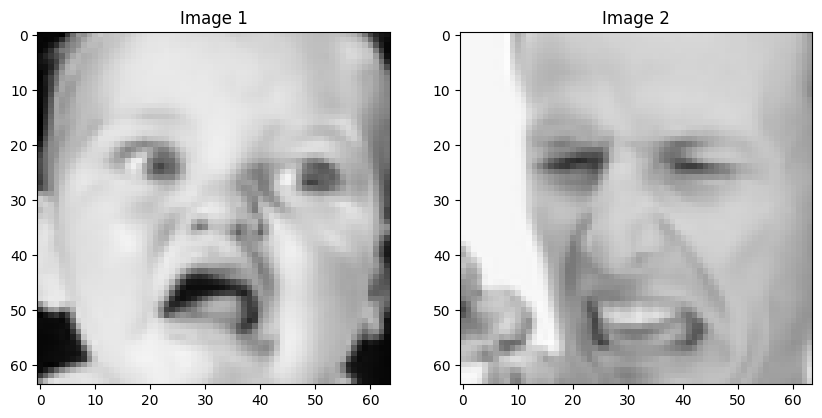

In [ ]:
## Assuming you have already loaded and preprocessed your train_data as mentioned in the previous response

# Display the first two images from train_data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(train_data[0])  # Assuming train_data[0] contains the first image
axes[0].set_title("Image 1")

# Display the second image
axes[1].imshow(train_data[1])  # Assuming train_data[1] contains the second image
axes[1].set_title("Image 2")

plt.show()

In [ ]:
# Model definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

# Compilation of the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# To get an idea of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

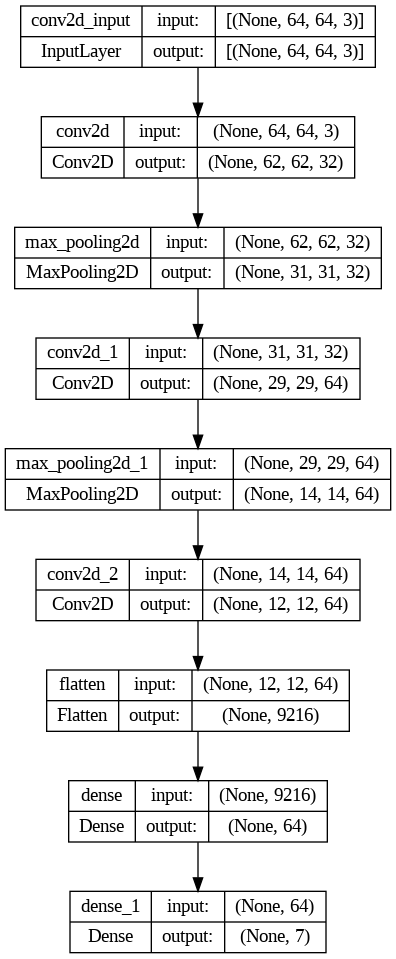

In [ ]:
# Gives the model architecture in a visually appealing manner
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.layers
model.get_weights()

[array([[[[ 0.09460577,  0.08462788, -0.05541815,  0.01838008,
            0.00593947,  0.02445367, -0.06642908, -0.00425194,
            0.00590508, -0.12352364, -0.02719731, -0.13087137,
           -0.06603403,  0.09090737, -0.09819391, -0.08991597,
            0.13581674,  0.09809171, -0.07296336,  0.09276789,
           -0.06433281,  0.08087696,  0.11030482, -0.09049368,
           -0.12971723, -0.02662697,  0.0712281 ,  0.0794706 ,
            0.07392903,  0.0226815 ,  0.09446773, -0.01603896],
          [ 0.09119515, -0.12790242,  0.06658587, -0.00639503,
           -0.12639558, -0.07085374, -0.03449617, -0.13231717,
            0.01212983,  0.10359235, -0.00423305,  0.13318597,
            0.05498114, -0.01541084, -0.04824844,  0.09795427,
            0.07627732, -0.04788747, -0.06583449, -0.02244601,
           -0.11866523,  0.06918101, -0.13031296,  0.0654107 ,
            0.0038166 ,  0.09050286,  0.02806757, -0.0094848 ,
           -0.1031689 ,  0.08411694, -0.13350916,  0.1

In [ ]:
# Fitting the model built to the training dataset

epochs = 30
history = model.fit(train_data, train_labels, epochs = epochs)

Epoch 1/30
898/898 [==============================] - 16s 6ms/step - loss: 2.2130 - accuracy: 0.2928
Epoch 2/30
898/898 [==============================] - 6s 7ms/step - loss: 1.5768 - accuracy: 0.3864
Epoch 3/30
898/898 [==============================] - 6s 6ms/step - loss: 1.4955 - accuracy: 0.4213
Epoch 4/30
898/898 [==============================] - 5s 6ms/step - loss: 1.4067 - accuracy: 0.4623
Epoch 5/30
898/898 [==============================] - 6s 6ms/step - loss: 1.3012 - accuracy: 0.5054
Epoch 6/30
898/898 [==============================] - 6s 6ms/step - loss: 1.1895 - accuracy: 0.5498
Epoch 7/30
898/898 [==============================] - 5s 6ms/step - loss: 1.0554 - accuracy: 0.6085
Epoch 8/30
898/898 [==============================] - 5s 6ms/step - loss: 0.9041 - accuracy: 0.6649
Epoch 9/30
898/898 [==============================] - 6s 7ms/step - loss: 0.7506 - accuracy: 0.7233
Epoch 10/30
898/898 [==============================] - 5s 6ms/step - loss: 0.6021 - accuracy: 0.781

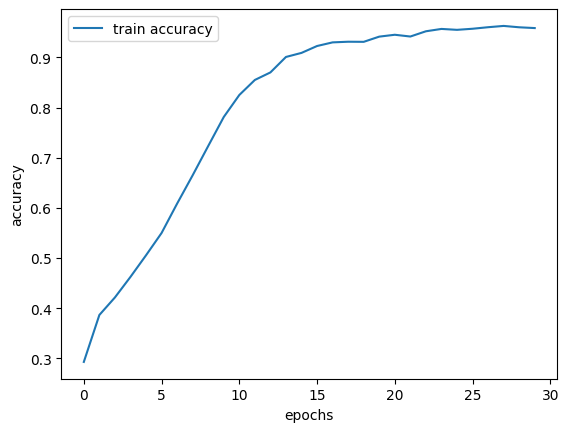

In [ ]:
epochs = list(range(epochs))

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
# plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

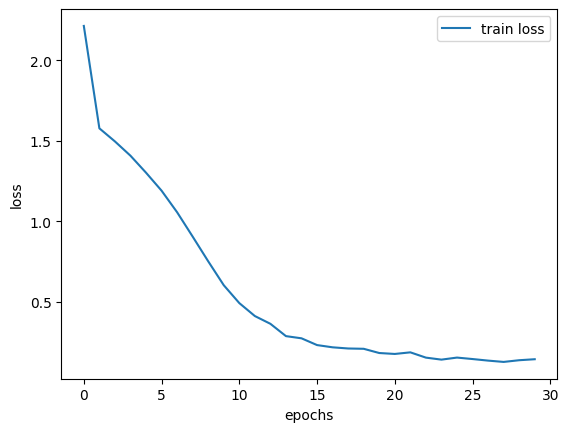

In [ ]:
loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
# plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Assuming you have a trained model and a test dataset
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

270/270 [==============================] - 1s 4ms/step - loss: 0.0990 - accuracy: 0.9709
Test Loss: 0.09897054731845856
Test Accuracy: 0.9708579778671265


In [ ]:
model.save("/content/drive/MyDrive/NNFL Project/Models/final_model_Custom.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
